**Predicting Stock Price Using RNN**

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Train Dataset

In [2]:
# Importing the training set
dataset_train = pd.read_csv('Train.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dataset_train.head()

,date,symbol,open,close,low,high,volume
0,04-01-2010,A,31.389999,31.300001,31.130000,31.630001,3815500.0
1,04-01-2010,AAL,4.840000,4.770000,4.660000,4.940000,9837300.0
2,04-01-2010,AAP,40.700001,40.380001,40.360001,41.040001,1701700.0
3,04-01-2010,AAPL,213.429998,214.009998,212.380001,214.499996,123432400.0
4,04-01-2010,ABC,26.290001,26.629999,26.139999,26.690001,2455900.0


In [4]:
training_set = dataset_train.iloc[:, 2:3].values 

In [5]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler    
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 649999):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [7]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [8]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [9]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True)) 
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 10, batch_size = 1000)

Epoch 1/10
649939/649939 [==============================] - 1241s 2ms/step - loss: 0.0031
Epoch 2/10
649939/649939 [==============================] - 1229s 2ms/step - loss: 0.0031
Epoch 3/10
649939/649939 [==============================] - 1227s 2ms/step - loss: 0.0030
Epoch 4/10
649939/649939 [==============================] - 1229s 2ms/step - loss: 0.0030
Epoch 5/10
649939/649939 [==============================] - 1209s 2ms/step - loss: 0.0029
Epoch 6/10
649939/649939 [==============================] - 1218s 2ms/step - loss: 0.0025
Epoch 7/10
649939/649939 [==============================] - 1223s 2ms/step - loss: 0.0017
Epoch 8/10
649939/649939 [==============================] - 1226s 2ms/step - loss: 0.0014
Epoch 9/10
649939/649939 [==============================] - 1222s 2ms/step - loss: 0.0011
Epoch 10/10
649939/649939 [==============================] - 1210s 2ms/step - loss: 0.0010


In [11]:
regressor.save("model_stock_price_prediction.h5")

In [13]:
from tensorflow import keras
regressor = keras.models.load_model("model_stock_price_prediction.h5")

In [14]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)               

**Test dataset**

In [15]:
dataset_test = pd.read_excel('Test.xlsx')

In [16]:
dataset_test.head()

,date,symbol,open,close,low,high,volume
0,2015-05-28,SYK,96.459999,96.239998,95.830002,96.940002,862600
1,2015-05-28,SYMC,24.670000,24.809999,24.610001,24.840000,1619700
2,2015-05-28,SYY,37.540001,37.250000,37.209999,37.570000,2315900
3,2015-05-28,T,34.959999,34.799999,34.639999,34.970001,19591700
4,2015-05-28,TAP,73.959999,74.540001,73.839996,74.769997,1755000


In [17]:
real_stock_price = dataset_test.iloc[:, 2:3].values

In [18]:
dataset_total = pd.concat((dataset_train['open'], dataset_test['open']), axis = 0)

In [19]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [20]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [22]:
X_test = []
for i in range(60, 201325):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

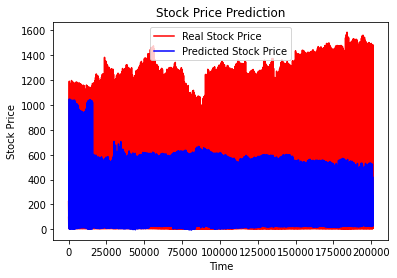

In [23]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

From above graph we can interpreted that our model able to predict the trend of up and down in stock price but it slightly get disturb at sharp corners but definetlty it predict the trend.